<a href="https://colab.research.google.com/github/kpaulfran/sales-predictions/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('/content/sales_predictions.csv')

df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [23]:
#Dataframe 
df.shape

(8523, 12)

In [24]:
#Dataframe info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Identificar y eliminar duplicados.

In [25]:
print(df.duplicated())
print(f'Numero de datos duplicados es {df.duplicated().sum()}')

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool
Numero de datos duplicados es 0


Identifique valores faltantes

In [26]:
filas_ = len(df.axes[0])
print(filas_)
percentna_weigh = df['Item_Weight'].isna().sum()
percentna_osize = df['Outlet_Size'].isna().sum()

print(f'% column weight {round(percentna_weigh/filas_,2)}')
print(f'% column outlet size {round(percentna_osize/filas_,2)}')

8523
% column weight 0.17
% column outlet size 0.28


In [27]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [28]:
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [29]:
df_filter = df[df['Item_Weight'].isna()]
df_filter

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

Con los datos faltante en item weights se va a optar por colocar el promedio, la desviación de los datos es 4,13. no se va a eliminar ningun dato por que eliminarlos causaria que se pierda la informacion del resto de columnas que si tienen datos.

In [30]:
mean_ItemWeight = df['Item_Weight'].mean()
df = df.fillna({ 'Item_Weight' : mean_ItemWeight})
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Los datos faltantes de la columna al ser cualitativos se comportas de diferente forma.

In [31]:
df_filter = df[df['Outlet_Size'].isna()]
df_filter

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Debido a que faltan aproximadamente el 30% de los datos vamos a eliminar esta columna.

In [32]:
df = df.drop(columns = ['Outlet_Size'])
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [34]:
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [35]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [36]:
df['Item_Fat_Content'].replace({'Low fat': 'Low Fat', 'LF' : 'Low Fat', 'reg': 'Regular'}, inplace = True)
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat']


In [37]:
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [38]:
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [39]:
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [40]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Graficos de visualizacion

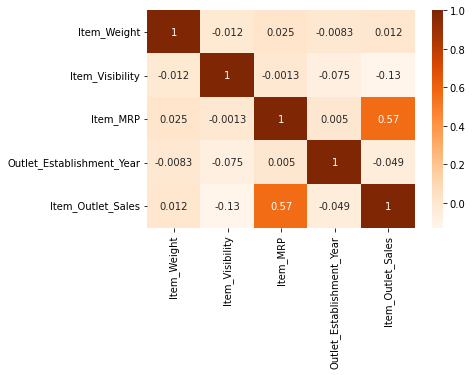

In [47]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot = True)


Se observa una correlacion moderada entre las variables:

- Item_Oulet_Sales
- Item_MRP

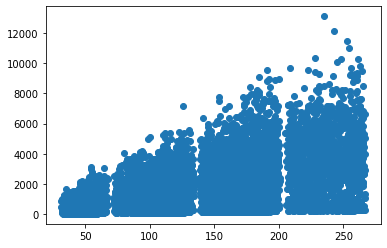

In [49]:
y_values = df['Item_Outlet_Sales'].values
x_values = df['Item_MRP'].values
plt.scatter(x_values, y_values)

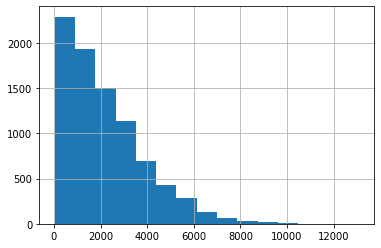

In [54]:
df['Item_Outlet_Sales'].hist(bins = 15)

#Las ventas se concentran su mayoria entre los valores de 0 y 4000.

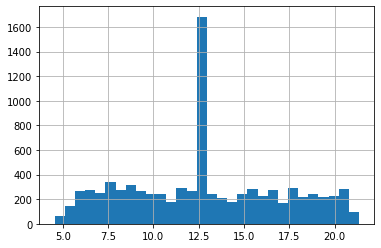

In [56]:
df['Item_Weight'].hist(bins = 30)

#El peso mas comum de los items es 12,8 aprox. La media, esto se deba talvez a que fue el valor que utilizamos para compensar los valores faltantes de esta columna

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

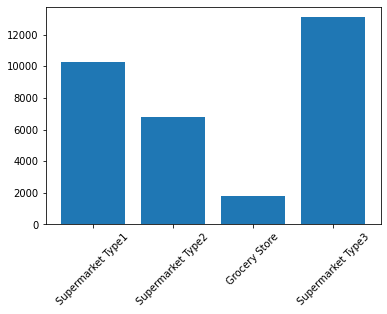

In [62]:
plt.bar(df['Outlet_Type'], df['Item_Outlet_Sales'])
plt.xticks(rotation = 45)

#Las mayor cantidad de ventas se generan en Supermarket Type 3 y Supermarket Type 1

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

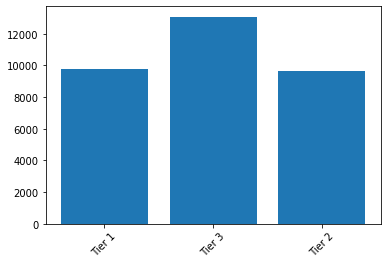

In [65]:
plt.bar(df['Outlet_Location_Type'], df['Item_Outlet_Sales'])
plt.xticks(rotation = 45)

#Las mayor cantidad de ventas se generan en la location de Tier 3.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

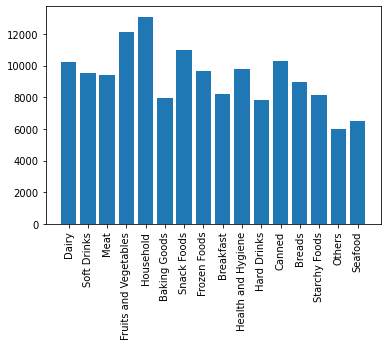

In [67]:
plt.bar(df['Item_Type'], df['Item_Outlet_Sales'])
plt.xticks(rotation = 90)

#Los objetos que mas se venden son frutas y vegetales, y cosas de casa.
#Lo que menos se vende son mariscos.

 Promedio de ventas de productos de baja grasa : 2159.1614376318225
 Promedio de ventas de productos regulartes : 2224.5611701264143



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


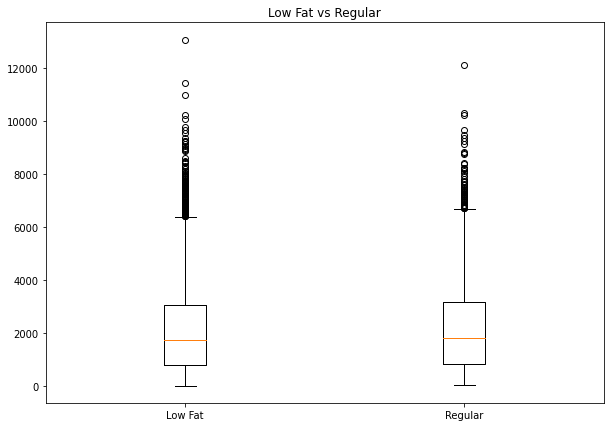

In [82]:
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales'].values
regular  = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales'].values

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.boxplot([low_fat,regular], labels = ['Low Fat', 'Regular'])
plt.title('Low Fat vs Regular')

print(f' Promedio de ventas de productos de baja grasa : {low_fat.mean()}')
print(f' Promedio de ventas de productos regulartes : {regular.mean()}\n')

Se observa que no existe una gran diferencia entre las ventas de productos de grasa regular vs los que son catalogas bajos en grasa.